In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
alldata = pd.read_csv('combined_data_rounded.csv')
alldata.head()

,Current residence in,Population 1 year and over,Same house 1 year ago,Same state of residence 1 year ago,Total_Incoming,Total_Outgoing,Net Migration,Avg. Home Price,Percent of Job Growth,Alabama,...,Virginia,Washington,West Virginia,Wisconsin,Wyoming,Total,Puerto Rico,U.S. Island Area,Foreign Country4,Foreign Country
0,Alabama,4819343,4158224,535649,111803,101466,10337,129174,1,0,...,4277,1289,1070,1121,104,13667,476,0,13191,0
1,Alaska,730874,595804,98168,30199,42972,-12773,291459,-1,942,...,360,3653,0,2500,6,6703,0,965,5738,0
2,Arizona,6935358,5717189,911120,261727,163214,98513,228363,3,1337,...,3593,14392,318,3897,997,45322,438,91,44793,0
3,Arkansas,2968395,2509717,370309,79411,69850,9561,120987,1,574,...,1087,1539,0,958,12,8958,573,0,8385,0
4,California,39085984,34009331,4234770,523131,661026,-137895,508307,2,3715,...,21162,33143,789,9348,1395,318752,1864,842,316046,0


In [3]:
#Set dependent and independent variables
feature_cols = ['Net Migration','Percent of Job Growth']
X = alldata[feature_cols] 
y = alldata['Avg. Home Price']

In [4]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)

In [5]:
# import the class
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg = LogisticRegression(solver='lbfgs',class_weight='balanced', max_iter=10000)
# fit the model with data
logreg.fit(X_train,y_train)


y_pred=logreg.predict(X_test)

In [6]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 1, 0, 0]])

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
%matplotlib inline

Text(0.5, 257.44, 'Predicted label')

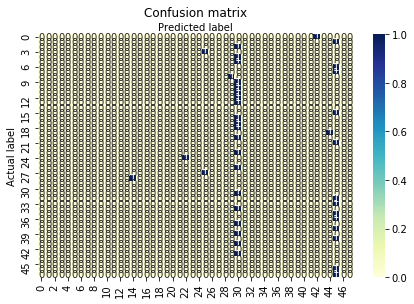

In [8]:
class_names=[0,1] 
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [12]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred, average = "micro"))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

TypeError: accuracy_score() got an unexpected keyword argument 'average'